In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import numpy as np
sns.set(style="darkgrid")

In [2]:
k=12


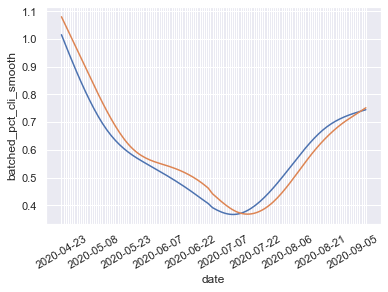

In [3]:
dfSpain = pd.read_csv('estimates-umd-batches/spain/ES_UMD_country_data.csv')
dsx=sns.lineplot(data=dfSpain, x="date", y="pct_cli_smooth")
sns.lineplot(data=dfSpain, ax=dsx, x="date", y="batched_pct_cli_smooth")
for ind, label in enumerate(dsx.get_xticklabels()):
    if ind % 15 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(30)
    else:
        label.set_visible(False)

In [4]:
cumuls=0
cumuls_batched=0

dfCumulSpain=pd.DataFrame(columns=['date','pct_cli_smooth_new','batched_pct_cli_smooth_new','pct_cli_smooth_cumul','batched_pct_cli_smooth_cumul','cumulCases_smooth','batched_cumulCases_smooth'])
for index, row in dfSpain.iterrows(): 
    date=row['date']
    spainPop=row['population']
    delta=dt.timedelta(days=k/2)
    newdate=(dt.datetime.strptime(date,"%Y-%m-%d") -delta).strftime("%Y-%m-%d")
    pct_newcases_batched=row['batched_pct_cli_smooth']/k
    pct_newcases=row['pct_cli_smooth']/k
     
    cumuls=cumuls+pct_newcases
    cumuls_batched=cumuls_batched+pct_newcases_batched
    
    newrow={'date': newdate,
            'pct_cli_smooth_new': pct_newcases,
            'batched_pct_cli_smooth_new': pct_newcases_batched,
            'pct_cli_smooth_cumul': cumuls,
            'batched_pct_cli_smooth_cumul': cumuls_batched,
            'cumulCases_smooth': np.round(cumuls*spainPop/100).astype(int),
            'batched_cumulCases_smooth': np.round(cumuls_batched*spainPop/100).astype(int)

           }
    
    dfCumulSpain=dfCumulSpain.append(newrow, ignore_index=True)

dfSpain = pd.merge(dfSpain, dfCumulSpain, on=['date'])    
dfSpain.to_csv("estimates-umd-batches/spain/ES_UMD_country_data_cumul.csv")

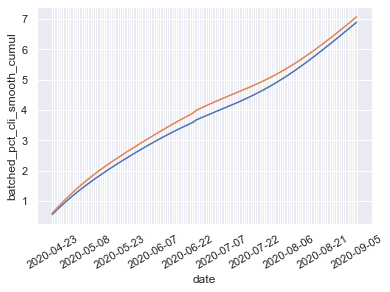

In [5]:
estimateCumul=pd.read_csv('estimates-umd-batches/spain/ES_UMD_country_data_cumul.csv')
csx=sns.lineplot(data=estimateCumul, x="date", y="pct_cli_smooth_cumul")
sns.lineplot(data=estimateCumul, ax=csx, x="date", y="batched_pct_cli_smooth_cumul")

for ind, label in enumerate(csx.get_xticklabels()):
    if ind % 15 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(30)
    else:
        label.set_visible(False)